# Experiment - 1: Eye Detection

In [ ]:
!pip install opencv-python

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image_path_1 = "/content/image.jpg"

In [ ]:
image_path_2 = "/content/image2.jpg"

In [ ]:
img_1 = cv2.imread(image_path_1)

In [ ]:
img_2 = cv2.imread(image_path_2)

In [ ]:
if img_1 is None:
    print("Error: Could not read the image. Please check the path.")
else:
    gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(img_1, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img_1[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    cv2_imshow(img_1)

Error: Could not read the image. Please check the path.


In [ ]:
if img_2 is None:
    print("Error: Could not read the image. Please check the path.")
else:
    gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(img_2, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img_2[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    cv2_imshow(img_2)

Error: Could not read the image. Please check the path.


# Experiment - 2 - Playing with Images

## Image Filters and Effects, Image Resizing and Cropping Tool, Color Picker and Extractor, Face Mask Filter

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image_path = "/content/sample.png"

In [ ]:
img = cv2.imread(image_path)

### GrayScale

In [ ]:
def apply_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Sepia Effect

In [ ]:
def apply_sepia(image):
    kernel = np.array([[0.393, 0.769, 0.189],
                       [0.349, 0.686, 0.168],
                       [0.272, 0.534, 0.131]])
    return cv2.transform(image, kernel)

### Negative Effect

In [ ]:
def apply_negative(image):
    return cv2.bitwise_not(image)

### Blur Effect

In [ ]:
def apply_blur(image, ksize=(5, 5)):
    return cv2.GaussianBlur(image, ksize, 0)

### Edge Detection

In [ ]:
def apply_edge_detection(image):
    return cv2.Canny(image, 100, 200)

### Cartoonify Image

In [ ]:
def apply_cartoonify(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(image, 9, 300, 300)
    return cv2.bitwise_and(color, color, mask=edges)

### Resizing

In [ ]:
def resize_image(image, width=500):
    aspect_ratio = width / float(image.shape[1])
    height = int(image.shape[0] * aspect_ratio)
    return cv2.resize(image, (width, height))

### Cropping

In [ ]:
def crop_image(image):
    height, width = image.shape[:2]
    size = min(height, width)
    center_x, center_y = width // 2, height // 2
    cropped = image[center_y - size // 2:center_y + size // 2, center_x - size // 2:center_x + size // 2]
    return cropped

### Rotation

In [ ]:
def rotate_image(image, angle=45):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(image, matrix, (width, height))
    return rotated

### Driver Codes

In [ ]:
grayscale_img = apply_grayscale(img)
sepia_img = apply_sepia(img)
negative_img = apply_negative(img)
blur_img = apply_blur(img)
edges_img = apply_edge_detection(img)
cartoon_img = apply_cartoonify(img)
resized_img = resize_image(img)
cropped_img = crop_image(img)
rotated_img = rotate_image(img)

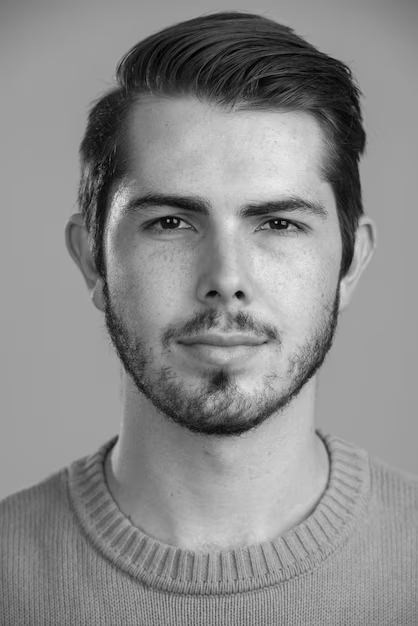

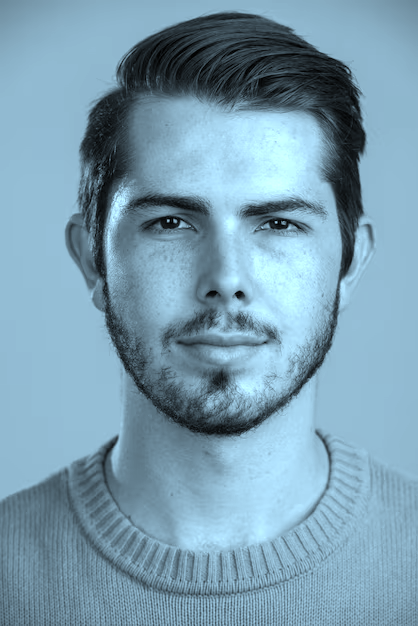

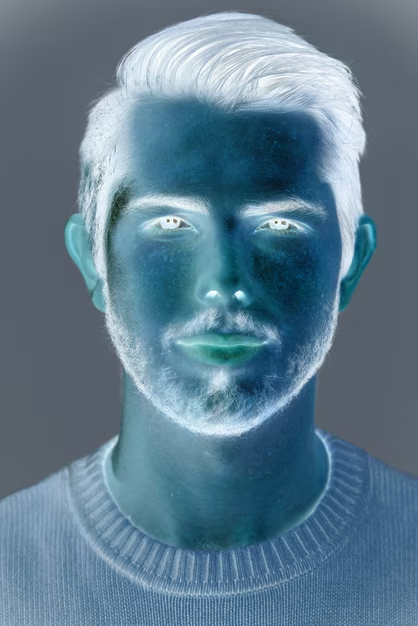

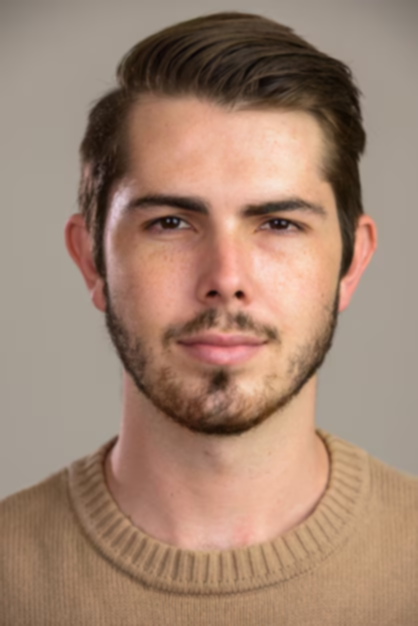

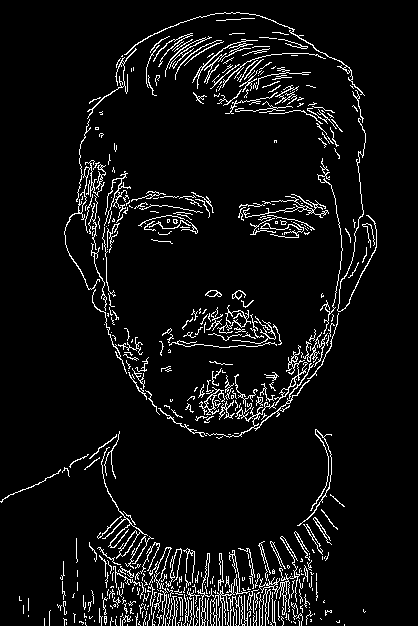

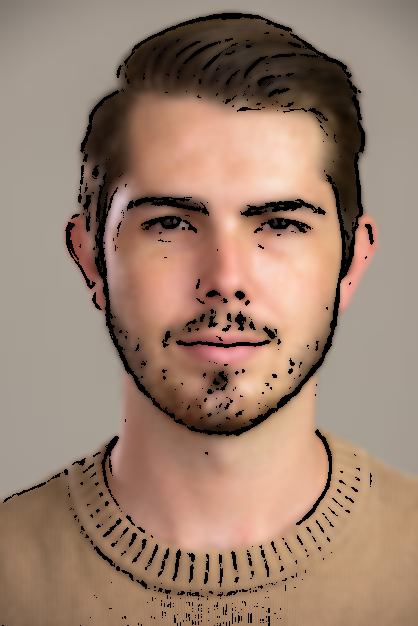

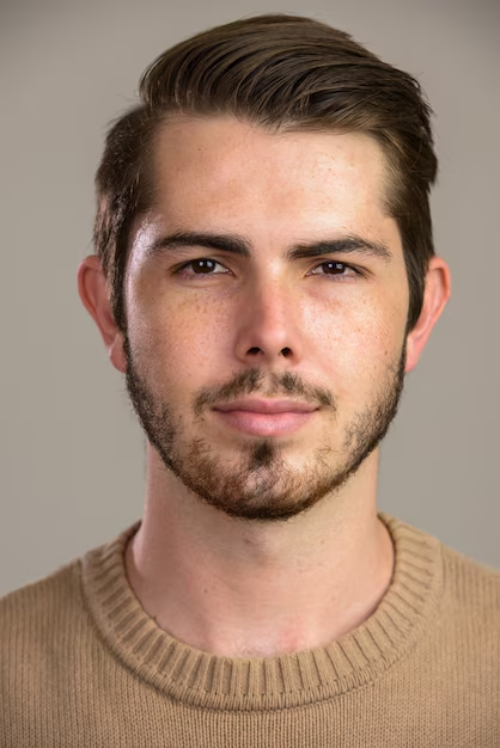

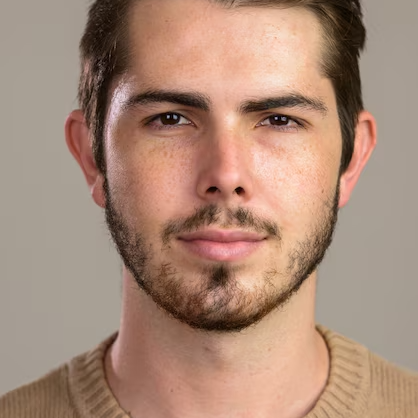

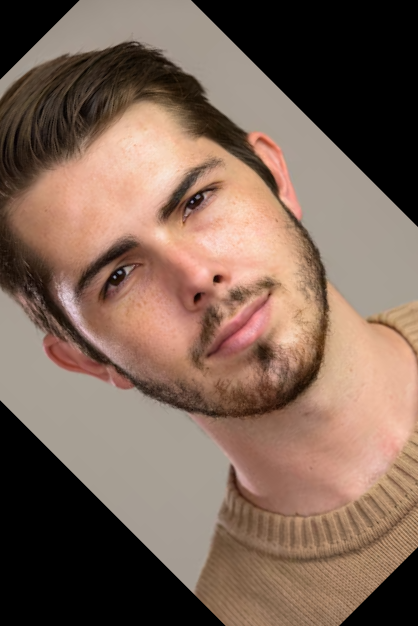

In [ ]:
cv2_imshow(grayscale_img)
cv2_imshow(sepia_img)
cv2_imshow(negative_img)
cv2_imshow(blur_img)
cv2_imshow(edges_img)
cv2_imshow(cartoon_img)
cv2_imshow(resized_img)
cv2_imshow(cropped_img)
cv2_imshow(rotated_img)